# Structurer un workflow pour le déployer en production

<center> <img src="workflow.png" alt="image workflow"> </center>

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [3]:
data = sns.load_dataset('tips')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
y = data['tip']

In [7]:
X = data.drop(columns=['tip'])

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
lg = LinearRegression()

# Iteration 1 - categoric features (get_dummies)

In [10]:
X_train

,total_bill,sex,smoker,day,time,size
113,23.95,Male,No,Sun,Dinner,2
109,14.31,Female,Yes,Sat,Dinner,2
114,25.71,Female,No,Sun,Dinner,3
110,14.00,Male,No,Sat,Dinner,2
27,12.69,Male,No,Sat,Dinner,2
...,...,...,...,...,...,...
117,10.65,Female,No,Thur,Lunch,2
23,39.42,Male,No,Sat,Dinner,4
52,34.81,Female,No,Sun,Dinner,4
35,24.06,Male,No,Sat,Dinner,3


In [11]:
y_train

113    2.55
109    4.00
114    4.00
110    3.00
27     2.00
       ... 
117    1.50
23     7.58
52     5.20
35     3.60
14     3.02
Name: tip, Length: 170, dtype: float64

In [12]:
#lg.fit(X_train, y_train)

In [13]:
X_train.sample(2)

,total_bill,sex,smoker,day,time,size
143,27.05,Female,No,Thur,Lunch,6
117,10.65,Female,No,Thur,Lunch,2


In [14]:
X_train_dummies = pd.get_dummies(X_train)

In [15]:
X_train_dummies.sample(2)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
229,22.12,2,0,1,1,0,0,0,1,0,0,1
83,32.68,2,1,0,1,0,1,0,0,0,1,0


In [16]:
lg_train = lg.fit(X_train_dummies, y_train)

In [17]:
X_test_dummies = pd.get_dummies(X_test)

In [18]:
lg_train.score(X_test_dummies, y_test)

0.4377652744635784

# Iteration 2 - categoric + numeric features

In [19]:
X_train_2,X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3)

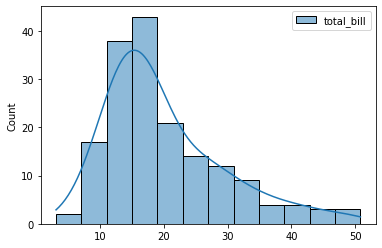

In [20]:
sns.histplot(data=X_train_2[["total_bill"]], kde=True);

<AxesSubplot:ylabel='Count'>

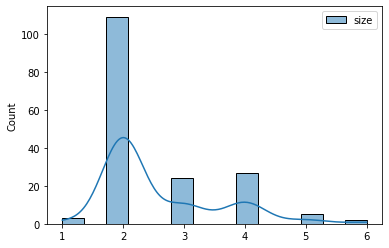

In [21]:
sns.histplot(data=X_train_2[["size"]], kde=True)

## Scaler

### Numerical features

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train_2[["size","total_bill"]])
X_train_2_scaled = scaler.transform(X_train_2[["size","total_bill"]])

In [23]:
X_train_2_scaled_df = pd.DataFrame(X_train_2_scaled)
X_train_2_scaled_df.rename(columns={0: "size_scaled", 1: "total_bill_scaled"})

,size_scaled,total_bill_scaled
0,0.6,0.614370
1,0.2,0.318810
2,0.4,0.276917
3,0.4,0.533724
4,0.2,0.463762
...,...,...
165,0.2,0.224969
166,0.6,0.440092
167,0.2,0.370549
168,0.2,0.093004


In [24]:
X_train_2_scaled_df

,0,1
0,0.6,0.614370
1,0.2,0.318810
2,0.4,0.276917
3,0.4,0.533724
4,0.2,0.463762
...,...,...
165,0.2,0.224969
166,0.6,0.440092
167,0.2,0.370549
168,0.2,0.093004


### Categorical Features

In [25]:
X_train_2[["sex","smoker","day","time"]].nunique()

sex       2
smoker    2
day       4
time      2
dtype: int64

In [26]:
ohe = OneHotEncoder()

In [27]:
ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

<170x10 sparse matrix of type '<class 'numpy.float64'>'
	with 680 stored elements in Compressed Sparse Row format>

In [28]:
X_train_2_ohe = ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

In [29]:
X_train_2_ohe_df = pd.DataFrame.sparse.from_spmatrix(X_train_2_ohe)

In [30]:
X_train_2_ohe_df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
X_train_2_prep_df = pd.concat([X_train_2_ohe_df, X_train_2_scaled_df], axis=1)

In [32]:
X_train_2_prep_df.head(3)

,0,1,2,3,4,5,6,7,8,9,0,1
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6,0.614370
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2,0.318810
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4,0.276917


In [33]:
lg_2 = LinearRegression()

In [34]:
lg_2.fit(X_train_2_prep_df,y_train_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [35]:
# ==> Il faut scaler le X_test_2_prep_df. Avec la même methodologie que le X_train_2, sans faire de dataLeakeage. 
# ==> Créer les methodes appropriées pour réutiliser la logique.

def scaled(X_train, X_test, scaler):
    columns = X_test._get_numeric_data().columns.values.tolist()
    scaler.fit(X_train[columns])
    df = pd.DataFrame(scaler.transform(X_test[columns]))
    return df.rename(columns={i:f'{columns[i]}_scaled' for i in range(len(columns))})

def oheed(X_train, X_test):
    columns = list(set(X.columns)-set(X_test._get_numeric_data().columns))
    ohe.fit(X_train[columns])
    return pd.DataFrame.sparse.from_spmatrix(ohe.transform(X_test[columns]))

def preped(X_train, X_test, scaler): 
    return pd.concat([oheed(X_train, X_test), scaled(X_train, X_test, scaler)], axis=1)

In [36]:
X_train_2_prep_df = preped(X_train_2, X_train_2, MinMaxScaler())
X_test_2_prep_df = preped(X_train_2, X_test_2, MinMaxScaler())

X_test_2_prep_df.head(3)

,0,1,2,3,4,5,6,7,8,9,total_bill_scaled,size_scaled
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.152283,0.4
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.140553,0.2
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.567030,0.6


In [37]:
lg_2.fit(X_train_2_prep_df,y_train_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [38]:
lg_2.score(X_test_2_prep_df, y_test_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.24594447403037212

In [39]:
y_pred = lg_2.predict(X_test_2_prep_df)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


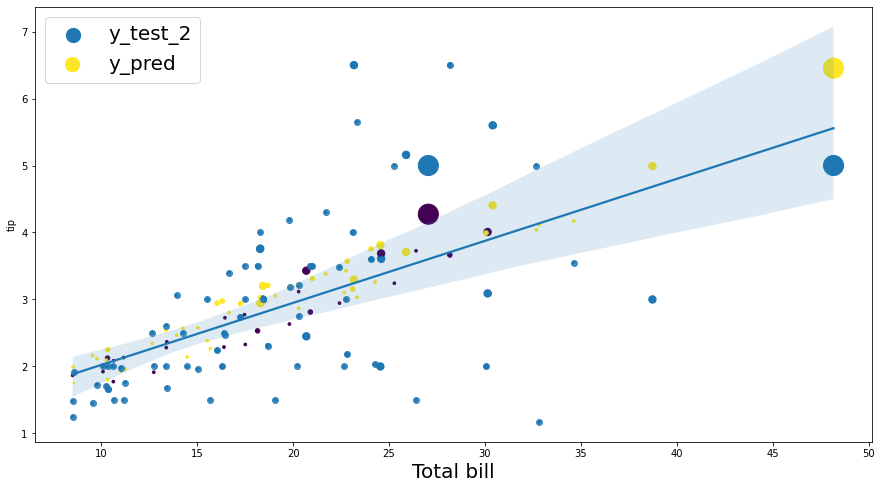

In [40]:
# Afficher un nuage de point qui révéle les informations suivantes : y_true vs y_predict en fonction de total_bill

plt.figure(figsize=(15, 8))
plt.scatter(X_test_2['total_bill'], y_test_2, label='y_test_2', s=np.exp(X_test_2['size']))
plt.scatter(X_test_2['total_bill'], y_pred, label='y_pred', s=np.exp(X_test_2['size']), c=pd.get_dummies(X_test_2['sex'])['Male'])
sns.regplot(X_test_2['total_bill'], y_test_2)
plt.xlabel('Total bill', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [41]:
# Re-testester avec un StandardScaler => https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

X_train_2_prep_df_std = preped(X_train_2, X_train_2, StandardScaler())
X_test_2_prep_df_std = preped(X_train_2, X_test_2, StandardScaler())
lg_2.score(X_test_2_prep_df_std, y_test_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


-10.788850150861032

In [42]:
y_pred_std = lg_2.predict(X_test_2_prep_df_std)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


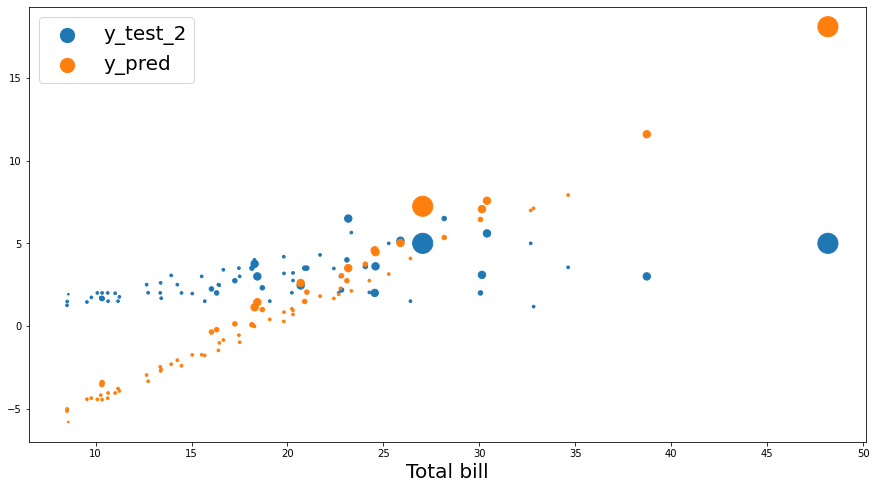

In [47]:
plt.figure(figsize=(15, 8))
plt.scatter(X_test_2['total_bill'], y_test_2, label='y_test_2', s=np.exp(X_test_2['size']))
plt.scatter(X_test_2['total_bill'], y_pred_std, label='y_pred', s=np.exp(X_test_2['size']))
plt.xlabel('Total bill', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [44]:
# Afficher l'hétéroscédasticité ou l'homoscédasticité des erreurs.

In [45]:
# Afficher la distribution des erreurs. (Normalité des erreus).

In [46]:
# Créer un package à l'aide https://pypi.org/project/setuptools/